In [2]:
# loading packages

import os

import pandas as pd
import numpy as np

# plotting packages
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as clrs

# Kmeans algorithm from scikit-learn
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering


## Load raw data

In [3]:
# load raw data
DATA_FOLDER = './'
raw = pd.read_csv(os.path.join(DATA_FOLDER, 'country risk 2019 data.csv'))

# check the raw data
print("Size of the dataset (row, col): ", raw.shape)
print("\nFirst 5 rows\n", raw.head(n=5))

Size of the dataset (row, col):  (121, 6)

First 5 rows
      Country Abbrev  Corruption  Peace  Legal  GDP Growth
0    Albania     AL          35  1.821  4.546       2.983
1    Algeria     DZ          35  2.219  4.435       2.553
2  Argentina     AR          45  1.989  5.087      -3.061
3    Armenia     AM          42  2.294  4.812       6.000
4  Australia     AU          77  1.419  8.363       1.713


## Simple exploratory analysis
### Print summary statistics
Note that all features have quite different variances, and Corruption and Legal are highly correlated.

In [4]:
# print summary statistics
numeric_columns = raw.select_dtypes(include=[np.number])
print("\nSummary statistics\n", numeric_columns.describe())
print("\nCorrelation matrix\n", numeric_columns.corr())


Summary statistics
        Corruption       Peace       Legal  GDP Growth
count  121.000000  121.000000  121.000000  121.000000
mean    46.842975    2.001017    5.752529    2.657529
std     18.702499    0.461485    1.373932    2.563741
min     15.000000    1.072000    2.671000   -9.459000
25%     33.000000    1.699000    4.785000    1.249000
50%     41.000000    1.939000    5.455000    2.600000
75%     60.000000    2.294000    6.488000    4.000000
max     87.000000    3.369000    8.712000    7.800000

Correlation matrix
             Corruption     Peace     Legal  GDP Growth
Corruption    1.000000 -0.705002  0.938512   -0.123545
Peace        -0.705002  1.000000 -0.662233   -0.004428
Legal         0.938512 -0.662233  1.000000   -0.150369
GDP Growth   -0.123545 -0.004428 -0.150369    1.000000


### Plot histogram

Note that distributions for GDP Growth is quite skewed.

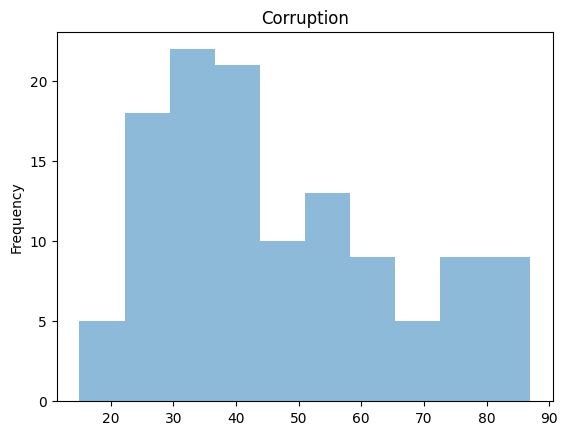

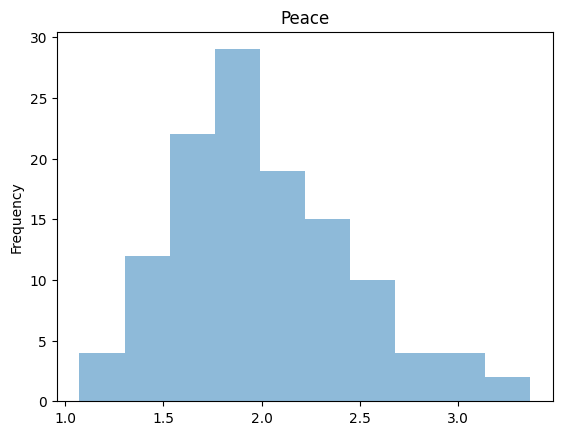

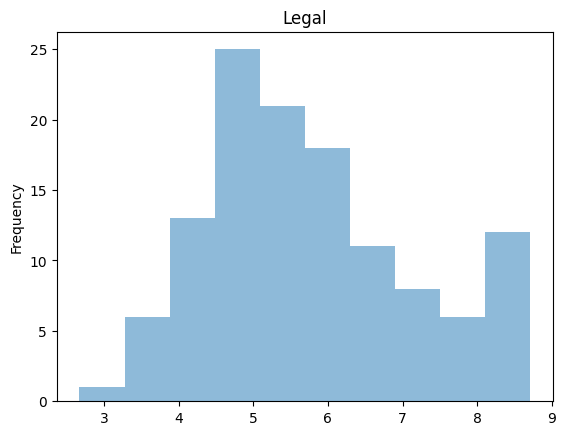

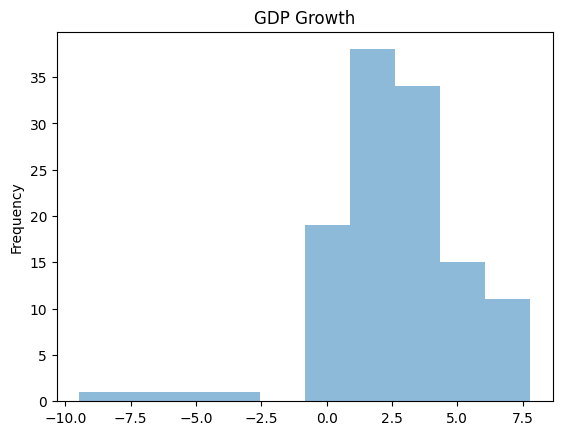

In [5]:
# plot histograms
plt.figure(1)
raw['Corruption'].plot(kind = 'hist', title = 'Corruption', alpha = 0.5)

plt.figure(2)
raw['Peace'].plot(kind = 'hist', title = 'Peace', alpha = 0.5)

plt.figure(3)
raw['Legal'].plot(kind = 'hist', title = 'Legal', alpha = 0.5)

plt.figure(4)
raw['GDP Growth'].plot(kind = 'hist', title = 'GDP Growth', alpha = 0.5)

plt.show()

## K means cluster
### Pick features & normalization

Since Corruption and Legal are highly correlated, we drop the Courrption variable, i.e., we pick three features for this analysis, Peace, Legal and GDP Grwoth. Let's normalize all the features, effectively making them equally weighted.

Ref. [Feature normalization.](https://stats.stackexchange.com/questions/21222/are-mean-normalization-and-feature-scaling-needed-for-k-means-clustering)

In [6]:
X = raw[['Peace', 'Legal', 'GDP Growth']]
X = (X - X.mean()) / X.std()
print(X.head(5))

      Peace     Legal  GDP Growth
0 -0.390081 -0.878158    0.126952
1  0.472352 -0.958948   -0.040772
2 -0.026039 -0.484397   -2.230541
3  0.634871 -0.684553    1.303747
4 -1.261182  1.900001   -0.368418


### Perform elbow method

The marginal gain of adding one cluster dropped quite a bit from k=3 to k=4. We will choose k=3 (not a clear cut though).

Ref. [Determining the number of clusters in a dataset.](https://en.wikipedia.org/wiki/Determining_the_number_of_clusters_in_a_data_set)

C:\Users\Kanish\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Kanish\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Kanish\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. 

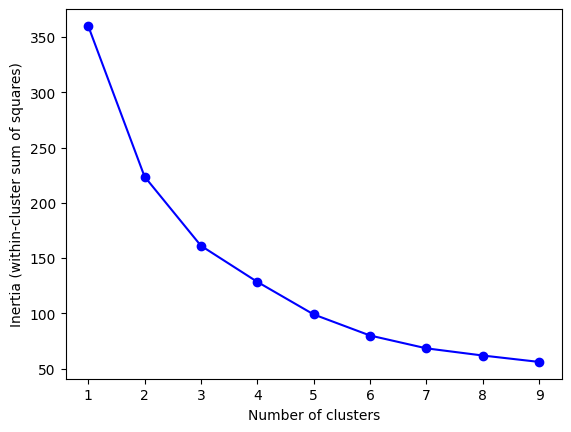

In [7]:
# https://stackoverflow.com/questions/41540751/sklearn-kmeans-equivalent-of-elbow-method

Ks = range(1, 10)
inertia = [KMeans(i).fit(X).inertia_ for i in Ks]

fig = plt.figure()
plt.plot(Ks, inertia, '-bo')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia (within-cluster sum of squares)')
plt.show()

### K means with k=3

In [8]:
k = 3
kmeans = KMeans(n_clusters=k, random_state=1)
kmeans.fit(X)

# print inertia & cluster center
print("inertia for k=3 is", kmeans.inertia_)
print("cluster centers: ", kmeans.cluster_centers_)

# take a quick look at the result
y = kmeans.labels_
print("cluster labels: ", y)

inertia for k=3 is 161.2893804348309
cluster centers:  [[ 1.22973303 -0.68496051 -0.94125294]
 [ 0.16803028 -0.59729967  0.69048743]
 [-0.85097477  1.02149992 -0.23897931]]
cluster labels:  [1 1 0 1 2 2 1 0 1 2 1 1 1 2 0 1 0 1 2 0 2 1 0 2 1 2 2 0 2 1 0 1 1 2 1 2 2
 1 1 2 1 1 1 1 2 2 1 1 0 2 0 2 2 2 2 1 1 2 2 2 0 0 2 1 1 2 1 1 2 0 1 1 1 1
 1 2 2 0 0 2 2 0 1 0 1 1 2 2 2 2 0 1 0 1 1 1 2 2 2 0 2 1 2 2 2 1 1 1 0 1 0
 1 0 2 2 2 2 1 0 1 0]


C:\Users\Kanish\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


### Visualize the result (3D plot)

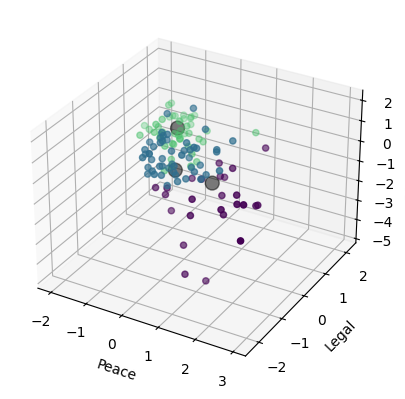

In [9]:
# set up the color
norm = clrs.Normalize(vmin=0.,vmax=y.max() + 0.8)
cmap = cm.viridis

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X.iloc[:,0], X.iloc[:,1], X.iloc[:,2], c=cmap(norm(y)), marker='o')

centers = kmeans.cluster_centers_
ax.scatter(centers[:, 0], centers[:, 1], c='black', s=100, alpha=0.5)

ax.set_xlabel('Peace')
ax.set_ylabel('Legal')
ax.set_zlabel('GDP Growth')

plt.show()

### Visualize the result (3 2D plots)

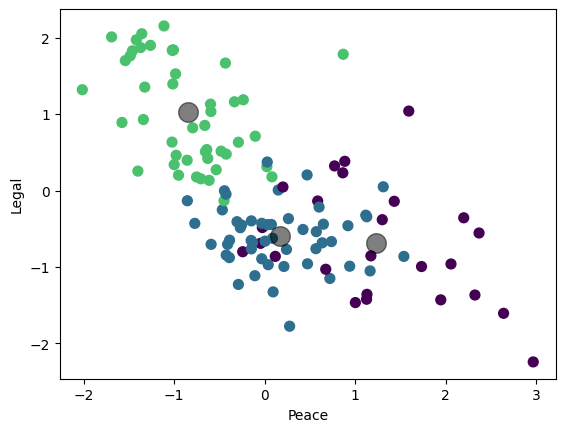

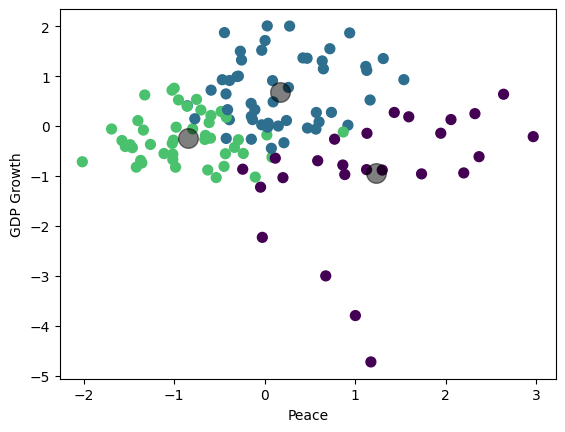

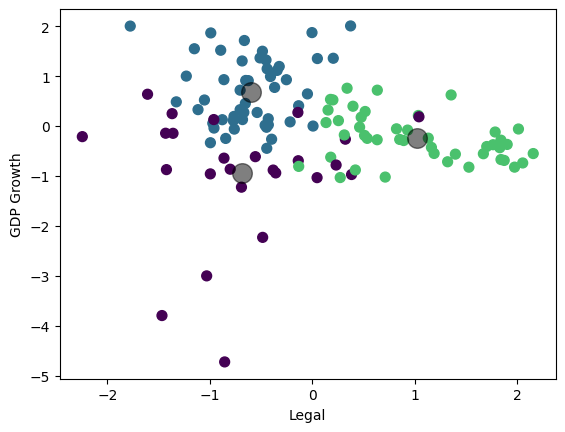

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt

figs = [(0, 1), (0, 2), (1, 2)]
labels = ['Peace', 'Legal', 'GDP Growth']

for i in range(3):
    fig = plt.figure(i)
    plt.scatter(X.iloc[:,figs[i][0]], X.iloc[:,figs[i][1]], c=cmap(norm(y)), s=50)
    plt.scatter(centers[:, figs[i][0]], centers[:, figs[i][1]], c='black', s=200, alpha=0.5)
    plt.xlabel(labels[figs[i][0]])
    plt.ylabel(labels[figs[i][1]])

plt.show()

### Visualize the result (3 2D plots)
plot country abbreviations instead of dots.

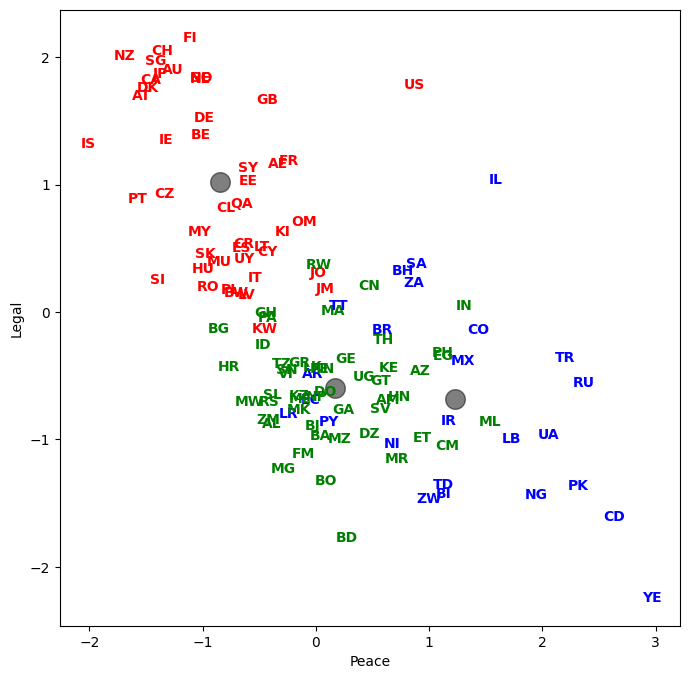

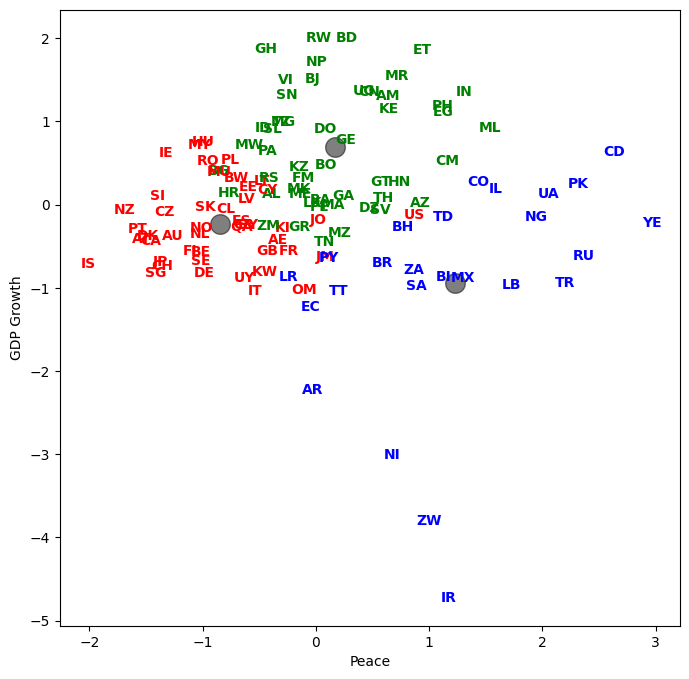

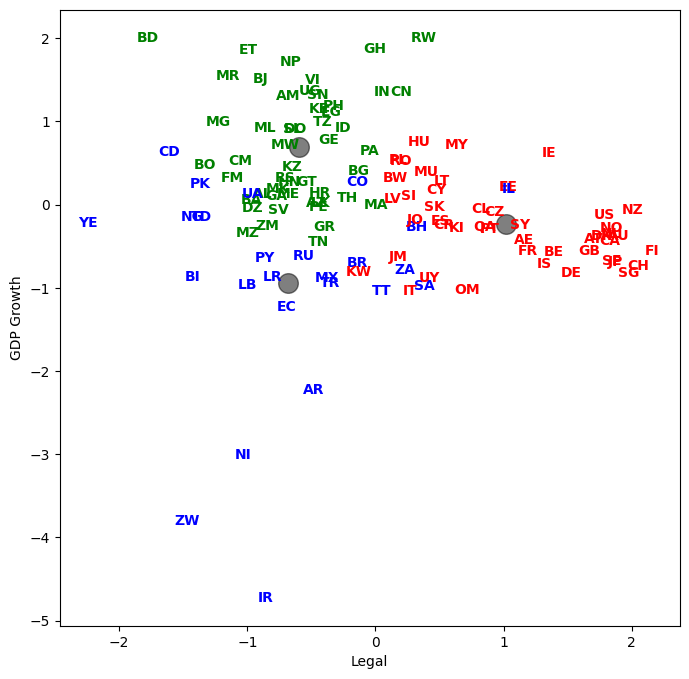

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt

figs = [(0, 1), (0, 2), (1, 2)]
labels = ['Peace', 'Legal', 'GDP Growth']
colors = ['blue','green', 'red']

for i in range(3):
    fig = plt.figure(i, figsize=(8, 8))
    x_1 = figs[i][0]
    x_2 = figs[i][1]
    plt.scatter(X.iloc[:, x_1], X.iloc[:, x_2], c=y, s=0, alpha=0)
    plt.scatter(centers[:, x_1], centers[:, x_2], c='black', s=200, alpha=0.5)
    for j in range(X.shape[0]):
        plt.text(X.iloc[j, x_1], X.iloc[j, x_2], raw['Abbrev'].iloc[j], 
                 color=colors[y[j]], weight='semibold', horizontalalignment = 'center', verticalalignment = 'center')
    plt.xlabel(labels[x_1])
    plt.ylabel(labels[x_2])

plt.show()

### List the result

In [12]:
result = pd.DataFrame({'Country':raw['Country'], 'Abbrev':raw['Abbrev'], 'Label':y})
with pd.option_context('display.max_rows', None, 'display.max_columns', 3):
    print(result.sort_values('Label'))


                          Country Abbrev  Label
60                        Lebanon     LB      0
30                        Ecuador     EC      0
48                           Iran     IR      0
50                         Israel     IL      0
61                        Liberia     LR      0
69                         Mexico     MX      0
77                      Nicaragua     NI      0
78                        Nigeria     NG      0
27   Democratic Republic of Congo     CD      0
81                       Pakistan     PK      0
90                         Russia     RU      0
92                   Saudi Arabia     SA      0
99                   South Africa     ZA      0
108           Trinidad and Tobago     TT      0
110                        Turkey     TR      0
112                       Ukraine     UA      0
118                         Yemen     YE      0
83                       Paraguay     PY      0
22                       Colombia     CO      0
120                      Zimbabwe     ZW

In [13]:
range_n_clusters=[2,3,4,5,6,7,8,9,10]
for n_clusters in range_n_clusters:
    clusterer=KMeans(n_clusters=n_clusters, random_state=1)
    cluster_labels=clusterer.fit_predict(X)
    silhouette_avg=silhouette_score(X,cluster_labels)
    print("For n_clusters=", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

For n_clusters= 2 The average silhouette_score is : 0.350913952385216
For n_clusters= 3 The average silhouette_score is : 0.3528797287395351
For n_clusters= 4 The average silhouette_score is : 0.35803162957185686
For n_clusters= 5 The average silhouette_score is : 0.34003870612236925
For n_clusters= 6 The average silhouette_score is : 0.34771309340459683
For n_clusters= 7 The average silhouette_score is : 0.3576330759244459
For n_clusters= 8 The average silhouette_score is : 0.3518828075521816
For n_clusters= 9 The average silhouette_score is : 0.3304595289568369
For n_clusters= 10 The average silhouette_score is : 0.3266381895688866


C:\Users\Kanish\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Kanish\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Kanish\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. 

### Part b - Varying the Value of n_init

In [14]:
n_init_values = [2, 20, 50, 100]
results = {}

for n_init in n_init_values:
    kmeans = KMeans(n_clusters=3, n_init=n_init, random_state=1)
    kmeans.fit(X)
    inertia = kmeans.inertia_
    labels = kmeans.labels_
    results[n_init] = (inertia, labels)


for n_init, (inertia, labels) in results.items():
    print(f"n_init={n_init}: Inertia={inertia}")




n_init=2: Inertia=161.2893804348309
n_init=20: Inertia=161.13338710052554
n_init=50: Inertia=161.13338710052554
n_init=100: Inertia=161.13338710052554


### n_init = 2

In [15]:
k = 3

# Changing random state to lower determinism of centroid cluster values 
kmeans1 = KMeans(n_clusters=k, n_init=2, random_state=42)
kmeans1.fit(X)

print("inertia for k=3 is ", kmeans1.inertia_)
print("cluster centers: ", kmeans1.cluster_centers_)

y1 = kmeans1.labels_
print("cluster labels: ", y1)

inertia for k=3 is  161.6546391921945
cluster centers:  [[-0.89982238  1.09922265 -0.26297334]
 [ 0.18161795 -0.49974369  0.56376029]
 [ 1.35385404 -0.83412368 -1.11084884]]
cluster labels:  [1 1 2 1 0 0 1 1 1 0 1 1 1 1 2 1 2 1 0 2 0 1 1 0 1 0 0 2 0 1 2 1 1 0 1 0 0
 1 1 0 1 1 1 1 0 0 1 1 2 0 1 0 1 0 1 1 1 0 0 0 2 1 0 1 1 0 1 1 0 2 1 1 1 1
 1 0 0 2 2 0 0 2 1 1 1 1 1 0 0 0 2 1 2 1 1 1 0 0 0 2 0 1 0 0 0 1 1 1 2 1 2
 1 2 0 0 0 0 1 2 1 2]


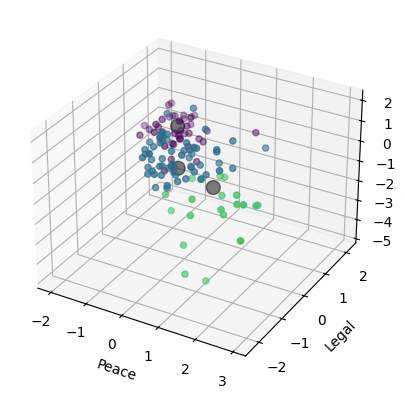

In [16]:
# set up the color
norm = clrs.Normalize(vmin=0.,vmax=y.max() + 0.8)
cmap = cm.viridis

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X.iloc[:,0], X.iloc[:,1], X.iloc[:,2], c=cmap(norm(y1)), marker='o')

centers = kmeans1.cluster_centers_
ax.scatter(centers[:, 0], centers[:, 1], c='black', s=100, alpha=0.5)

ax.set_xlabel('Peace')
ax.set_ylabel('Legal')
ax.set_zlabel('GDP Growth')

plt.show()

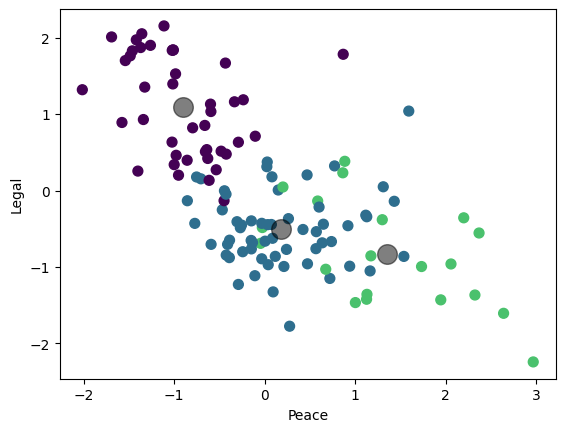

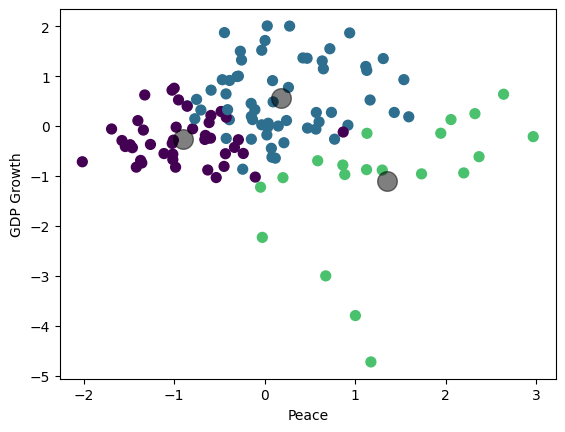

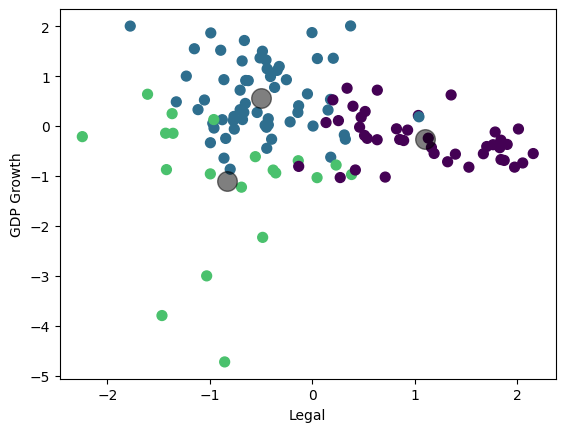

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt

figs = [(0, 1), (0, 2), (1, 2)]
labels = ['Peace', 'Legal', 'GDP Growth']

for i in range(3):
    fig = plt.figure(i)
    plt.scatter(X.iloc[:,figs[i][0]], X.iloc[:,figs[i][1]], c=cmap(norm(y1)), s=50)
    plt.scatter(centers[:, figs[i][0]], centers[:, figs[i][1]], c='black', s=200, alpha=0.5)
    plt.xlabel(labels[figs[i][0]])
    plt.ylabel(labels[figs[i][1]])

plt.show()

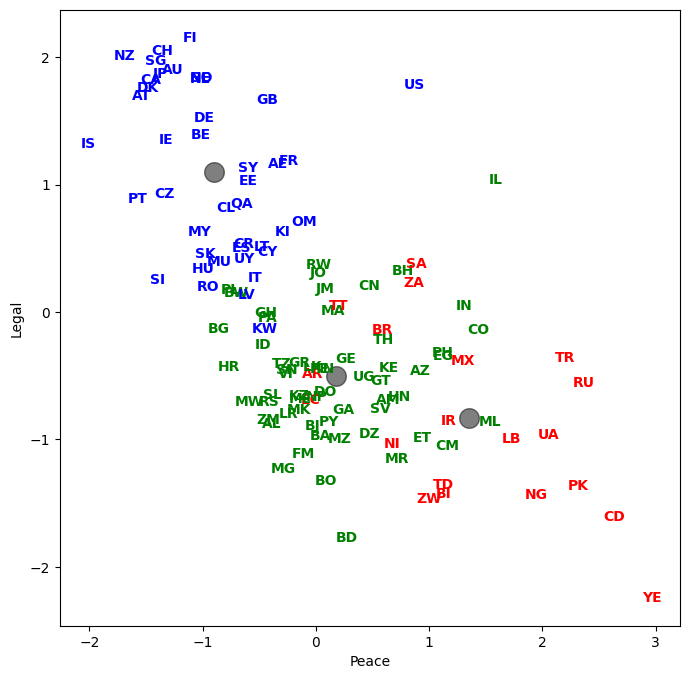

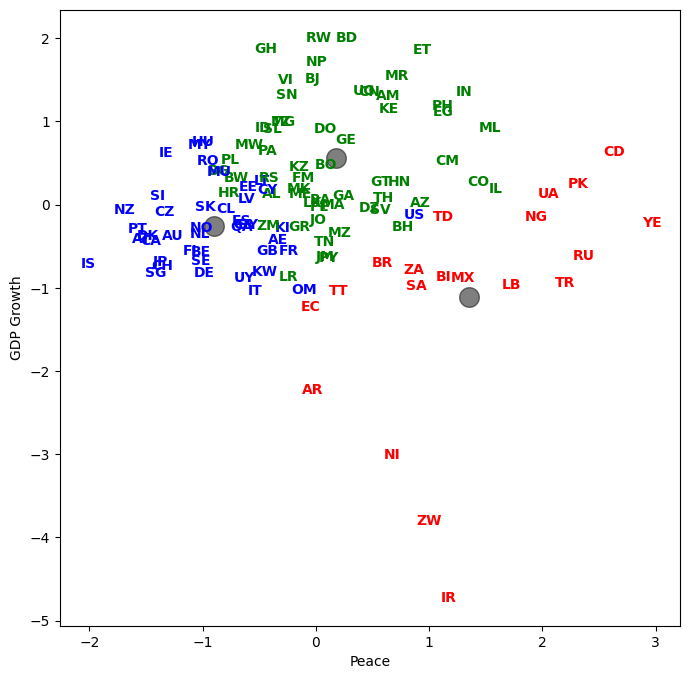

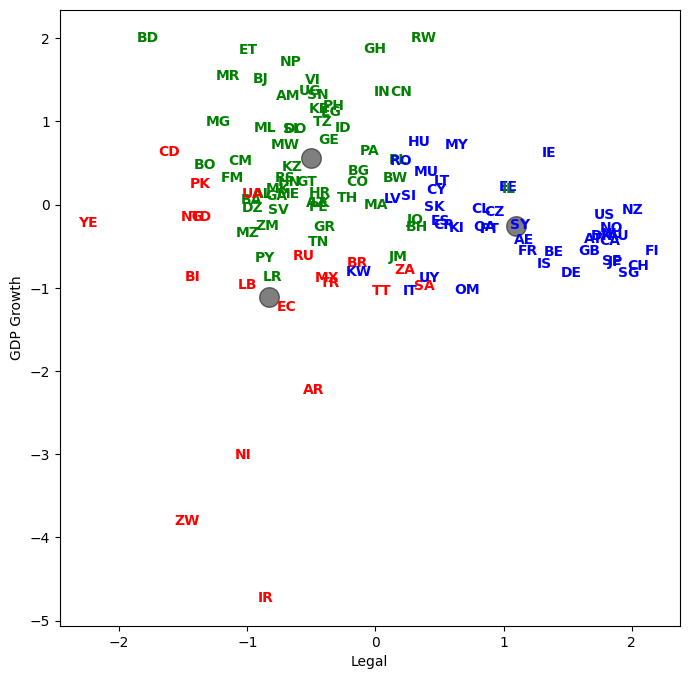

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt

figs = [(0, 1), (0, 2), (1, 2)]
labels = ['Peace', 'Legal', 'GDP Growth']
colors = ['blue','green', 'red']

for i in range(3):
    fig = plt.figure(i, figsize=(8, 8))
    x_1 = figs[i][0]
    x_2 = figs[i][1]
    plt.scatter(X.iloc[:, x_1], X.iloc[:, x_2], c=y, s=0, alpha=0)
    plt.scatter(centers[:, x_1], centers[:, x_2], c='black', s=200, alpha=0.5)
    for j in range(X.shape[0]):
        plt.text(X.iloc[j, x_1], X.iloc[j, x_2], raw['Abbrev'].iloc[j], 
                 color=colors[y1[j]], weight='semibold', horizontalalignment = 'center', verticalalignment = 'center')
    plt.xlabel(labels[x_1])
    plt.ylabel(labels[x_2])

plt.show()

In [19]:
result = pd.DataFrame({'Country':raw['Country'], 'Abbrev':raw['Abbrev'], 'Label':y1})
with pd.option_context('display.max_rows', None, 'display.max_columns', 3):
    print(result.sort_values('Label'))

                          Country Abbrev  Label
104                        Taiwan     SY      0
114                United Kingdom     GB      0
28                        Denmark     DK      0
113          United Arab Emirates     AE      0
62                      Lithuania     LT      0
33                        Estonia     EE      0
35                        Finland     FI      0
36                         France     FR      0
80                           Oman     OM      0
39                        Germany     DE      0
79                         Norway     NO      0
26                 Czech Republic     CZ      0
76                    New Zealand     NZ      0
44                        Hungary     HU      0
45                        Iceland     IS      0
49                        Ireland     IE      0
51                          Italy     IT      0
103                   Switzerland     CH      0
53                          Japan     JP      0
68                      Mauritius     MU

### n_init = 20

In [20]:
kmeans20 = KMeans(n_clusters=k, random_state=19, n_init=20)
kmeans20.fit(X)

# print inertia & cluster center
print("inertia for k=3 is", kmeans.inertia_)
print("cluster centers: ", kmeans.cluster_centers_)

# take a quick look at the result
y20 = kmeans20.labels_
print("cluster labels: ", y20)

inertia for k=3 is 161.13338710052554
cluster centers:  [[ 1.22506036 -0.83385901 -1.07842464]
 [ 0.23006626 -0.54045468  0.65506397]
 [-0.85097477  1.02149992 -0.23897931]]
cluster labels:  [1 1 2 1 0 0 1 1 1 0 1 1 1 0 2 1 2 1 0 2 0 1 1 0 1 0 0 2 0 1 2 1 1 0 1 0 0
 1 1 0 1 1 1 1 0 0 1 1 2 0 1 0 0 0 0 1 1 0 0 0 2 2 0 1 1 0 1 1 0 2 1 1 1 1
 1 0 0 2 2 0 0 2 1 2 1 1 0 0 0 0 2 1 2 1 1 1 0 0 0 2 0 1 0 0 0 1 1 1 2 1 2
 1 2 0 0 0 0 1 2 1 2]


In [21]:
result = pd.DataFrame({'Country':raw['Country'], 'Abbrev':raw['Abbrev'], 'Label':y20})
with pd.option_context('display.max_rows', None, 'display.max_columns', 3):
    print(result.sort_values('Label'))

                          Country Abbrev  Label
51                          Italy     IT      0
36                         France     FR      0
39                        Germany     DE      0
44                        Hungary     HU      0
45                        Iceland     IS      0
49                        Ireland     IE      0
52                        Jamaica     JM      0
53                          Japan     JP      0
54                         Jordan     JO      0
57                  Korea (South)     KI      0
58                         Kuwait     KW      0
59                         Latvia     LV      0
62                      Lithuania     LT      0
65                       Malaysia     MY      0
35                        Finland     FI      0
68                      Mauritius     MU      0
76                    New Zealand     NZ      0
79                         Norway     NO      0
80                           Oman     OM      0
86                         Poland     PL

### n_init = 50

In [22]:
k = 3
kmeans = KMeans(n_clusters=k, random_state=12, n_init=50)
kmeans.fit(X)

# print inertia & cluster center
print("inertia for k=3 is", kmeans.inertia_)
print("cluster centers: ", kmeans.cluster_centers_)

# take a quick look at the result
y50 = kmeans.labels_
print("cluster labels: ", y50)

inertia for k=3 is 161.13338710052554
cluster centers:  [[ 0.23006626 -0.54045468  0.65506397]
 [-0.85097477  1.02149992 -0.23897931]
 [ 1.22506036 -0.83385901 -1.07842464]]
cluster labels:  [0 0 2 0 1 1 0 0 0 1 0 0 0 1 2 0 2 0 1 2 1 0 0 1 0 1 1 2 1 0 2 0 0 1 0 1 1
 0 0 1 0 0 0 0 1 1 0 0 2 1 0 1 1 1 1 0 0 1 1 1 2 2 1 0 0 1 0 0 1 2 0 0 0 0
 0 1 1 2 2 1 1 2 0 2 0 0 1 1 1 1 2 0 2 0 0 0 1 1 1 2 1 0 1 1 1 0 0 0 2 0 2
 0 2 1 1 1 1 0 2 0 2]


In [23]:
result = pd.DataFrame({'Country':raw['Country'], 'Abbrev':raw['Abbrev'], 'Label':y50})
with pd.option_context('display.max_rows', None, 'display.max_columns', 3):
    print(result.sort_values('Label'))

                          Country Abbrev  Label
0                         Albania     AL      0
66                           Mali     ML      0
34                       Ethiopia     ET      0
84                           Peru     PE      0
106                      Thailand     TH      0
37                          Gabon     GA      0
38                        Georgia     GE      0
82                         Panama     PA      0
40                          Ghana     GH      0
41                         Greece     GR      0
42                      Guatemala     GT      0
43                       Honduras     HN      0
107          The FYR of Macedonia     MK      0
46                          India     IN      0
32                    El Salvador     SV      0
47                      Indonesia     ID      0
50                         Israel     IL      0
101                     Sri Lanka     LK      0
74                          Nepal     NP      0
55                     Kazakhstan     KZ

### n_init = 100

In [24]:
k = 3
kmeans = KMeans(n_clusters=k, random_state=67, n_init=100)
kmeans.fit(X)

# print inertia & cluster center
print("inertia for k=3 is", kmeans.inertia_)
print("cluster centers: ", kmeans.cluster_centers_)

# take a quick look at the result
y100 = kmeans.labels_
print("cluster labels: ", y100)

inertia for k=3 is 161.13338710052554
cluster centers:  [[ 1.22506036 -0.83385901 -1.07842464]
 [ 0.23006626 -0.54045468  0.65506397]
 [-0.85097477  1.02149992 -0.23897931]]
cluster labels:  [1 1 0 1 2 2 1 1 1 2 1 1 1 2 0 1 0 1 2 0 2 1 1 2 1 2 2 0 2 1 0 1 1 2 1 2 2
 1 1 2 1 1 1 1 2 2 1 1 0 2 1 2 2 2 2 1 1 2 2 2 0 0 2 1 1 2 1 1 2 0 1 1 1 1
 1 2 2 0 0 2 2 0 1 0 1 1 2 2 2 2 0 1 0 1 1 1 2 2 2 0 2 1 2 2 2 1 1 1 0 1 0
 1 0 2 2 2 2 1 0 1 0]


In [25]:
result = pd.DataFrame({'Country':raw['Country'], 'Abbrev':raw['Abbrev'], 'Label':y100})
with pd.option_context('display.max_rows', None, 'display.max_columns', 3):
    print(result.sort_values('Label'))

                          Country Abbrev  Label
60                        Lebanon     LB      0
30                        Ecuador     EC      0
48                           Iran     IR      0
61                        Liberia     LR      0
69                         Mexico     MX      0
77                      Nicaragua     NI      0
78                        Nigeria     NG      0
81                       Pakistan     PK      0
83                       Paraguay     PY      0
90                         Russia     RU      0
92                   Saudi Arabia     SA      0
99                   South Africa     ZA      0
108           Trinidad and Tobago     TT      0
110                        Turkey     TR      0
112                       Ukraine     UA      0
118                         Yemen     YE      0
27   Democratic Republic of Congo     CD      0
19                           Chad     TD      0
120                      Zimbabwe     ZW      0
16                        Burundi     BI

## Part C - Comparing high-risk countries based on feature variation

In [26]:
features = raw[['Corruption', 'Peace', 'Legal', 'GDP Growth']]
features_scaled = (features - features.mean())/ features.std()

kmeans = KMeans(n_clusters=3, n_init=100, random_state=42)
kmeans.fit(features_scaled)


labels = kmeans.labels_

feature4 = pd.DataFrame({'Country':raw['Country'], 'Abbrev':raw['Abbrev'], '3 Feature Cluster':labels})
feature4_feature3_comp = pd.merge(feature4, result)
feature4_feature3_comp = feature4_feature3_comp.rename(columns={'Label' : '4 Feature Cluster'})

pd.set_option("display.max_rows", None)

feature4_feature3_comp

,Country,Abbrev,3 Feature Cluster,4 Feature Cluster
0,Albania,AL,1,1
1,Algeria,DZ,1,1
2,Argentina,AR,0,0
3,Armenia,AM,1,1
4,Australia,AU,2,2
5,Austria,AT,2,2
6,Azerbaijan,AZ,1,1
7,Bahrain,BH,1,1
8,Bangladesh,BD,1,1
9,Belgium,BE,2,2


## Part D

### Linkage = 'ward'

In [27]:
agglomerative_clusters = AgglomerativeClustering(n_clusters=3, linkage='ward').fit(X)
c_ward = agglomerative_clusters.labels_

result_aw = pd.DataFrame({'Country':raw['Country'], 'Abbrev':raw['Abbrev'], 'Label':c_ward})
with pd.option_context('display.max_rows', None, 'display.max_columns', 3):
    print(result_aw.sort_values('Label'))


                          Country Abbrev  Label
0                         Albania     AL      0
70                        Moldova     FM      0
68                      Mauritius     MU      0
67                     Mauritania     MR      0
66                           Mali     ML      0
64                         Malawi     MW      0
63                     Madagascar     MG      0
61                        Liberia     LR      0
119                        Zambia     ZM      0
71                     Montenegro     ME      0
59                         Latvia     LV      0
56                          Kenya     KE      0
55                     Kazakhstan     KZ      0
108           Trinidad and Tobago     TT      0
52                        Jamaica     JM      0
51                          Italy     IT      0
50                         Israel     IL      0
115                 United States     US      0
47                      Indonesia     ID      0
58                         Kuwait     KW

### Linkage = 'complete'

In [28]:
agglomerative_clusters = AgglomerativeClustering(n_clusters=3, linkage='complete').fit(X)
c_complete = agglomerative_clusters.labels_

result_ac = pd.DataFrame({'Country':raw['Country'], 'Abbrev':raw['Abbrev'], 'Label':c_complete})
with pd.option_context('display.max_rows', None, 'display.max_columns', 3):
    print(result_ac.sort_values('Label'))


                          Country Abbrev  Label
0                         Albania     AL      0
57                  Korea (South)     KI      0
92                   Saudi Arabia     SA      0
55                     Kazakhstan     KZ      0
54                         Jordan     JO      0
53                          Japan     JP      0
52                        Jamaica     JM      0
51                          Italy     IT      0
58                         Kuwait     KW      0
50                         Israel     IL      0
94                         Serbia     RS      0
47                      Indonesia     ID      0
95                   Sierra Leone     SL      0
45                        Iceland     IS      0
44                        Hungary     HU      0
96                      Singapore     SG      0
97                       Slovakia     SK      0
49                        Ireland     IE      0
59                         Latvia     LV      0
119                        Zambia     ZM

### Linkage = 'average'

In [29]:
agglomerative_clusters = AgglomerativeClustering(n_clusters=3, linkage='average').fit(X)
c_average = agglomerative_clusters.labels_

result_aa = pd.DataFrame({'Country':raw['Country'], 'Abbrev':raw['Abbrev'], 'Label':c_average})
with pd.option_context('display.max_rows', None, 'display.max_columns', 3):
    print(result_aa.sort_values('Label'))


                          Country Abbrev  Label
0                         Albania     AL      0
76                    New Zealand     NZ      0
75                    Netherlands     NL      0
74                          Nepal     NP      0
73                     Mozambique     MZ      0
72                        Morocco     MA      0
71                     Montenegro     ME      0
70                        Moldova     FM      0
111                        Uganda     UG      0
68                      Mauritius     MU      0
67                     Mauritania     MR      0
109                       Tunisia     TN      0
66                           Mali     ML      0
64                         Malawi     MW      0
63                     Madagascar     MG      0
62                      Lithuania     LT      0
61                        Liberia     LR      0
119                        Zambia     ZM      0
59                         Latvia     LV      0
58                         Kuwait     KW

### Linkage = 'single'

In [30]:
agglomerative_clusters = AgglomerativeClustering(n_clusters=3, linkage='single').fit(X)
c_single = agglomerative_clusters.labels_

result_as = pd.DataFrame({'Country':raw['Country'], 'Abbrev':raw['Abbrev'], 'Label':c_single})
with pd.option_context('display.max_rows', None, 'display.max_columns', 3):
    print(result_as.sort_values('Label'))


                          Country Abbrev  Label
120                      Zimbabwe     ZW      0
48                           Iran     IR      0
77                      Nicaragua     NI      0
115                 United States     US      1
50                         Israel     IL      1
86                         Poland     PL      2
85                    Philippines     PH      2
84                           Peru     PE      2
83                       Paraguay     PY      2
82                         Panama     PA      2
81                       Pakistan     PK      2
80                           Oman     OM      2
79                         Norway     NO      2
78                        Nigeria     NG      2
76                    New Zealand     NZ      2
75                    Netherlands     NL      2
73                     Mozambique     MZ      2
87                       Portugal     PT      2
72                        Morocco     MA      2
71                     Montenegro     ME

## Part E

In [31]:
venezuela_data = pd.DataFrame({
    'Country': ['Venezuela'],
    'Abbrev' : ['VE'],
    'Corruption': [16],
    'Peace': [2.671],
    'Legal': [2.895],
    'GDP Growth': [-35]
})

# Append the Venezuela DataFrame to the existing 'raw' DataFrame
ven_raw = pd.concat([raw, venezuela_data], ignore_index=True)

# Display the last few rows to verify Venezuela has been added
print(ven_raw.tail())

       Country Abbrev  Corruption  Peace  Legal  GDP Growth
117    Vietnam     VI          37  1.877  5.084       6.500
118      Yemen     YE          15  3.369  2.671       2.113
119     Zambia     ZM          34  1.805  4.592       2.021
120   Zimbabwe     ZW          24  2.463  3.738      -7.077
121  Venezuela     VE          16  2.671  2.895     -35.000


In [32]:
X_ven = ven_raw[['Peace', 'Legal', 'GDP Growth']]
X_ven = (X_ven - X_ven.mean()) / X_ven.std()
print(X_ven.head(5))

      Peace     Legal  GDP Growth
0 -0.400182 -0.849636    0.148881
1  0.458391 -0.929350    0.047927
2 -0.037769 -0.461122   -1.270112
3  0.620183 -0.658611    0.857204
4 -1.267384  1.891504   -0.149286


In [33]:
k = 3
kmeans_ven = KMeans(n_clusters=k, random_state=1)
kmeans_ven.fit(X_ven)

# print inertia & cluster center
print("inertia for k=3 is", kmeans_ven.inertia_)
print("cluster centers: ", kmeans_ven.cluster_centers_)

# take a quick look at the result
y_ven = kmeans_ven.labels_
print("cluster labels: ", y_ven)

inertia for k=3 is 147.35815961158326
cluster centers:  [[ 0.50083526 -0.57899064  0.14262782]
 [-0.9090402   1.05949011 -0.05031098]
 [ 1.4334541  -2.03528534 -8.76865913]]
cluster labels:  [0 0 0 0 1 1 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 1 0 1 1 0 1 0 0 0 0 1 0 1 1
 0 0 1 0 0 0 0 1 1 0 0 0 1 0 1 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 0 0 0
 0 1 1 0 0 1 1 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 1 0 1 0 1 1 1 0 0 0 0 0 0
 0 0 1 1 1 1 0 0 0 0 2]


C:\Users\Kanish\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [34]:
print(len(ven_raw['Country']), len(ven_raw['Abbrev']), len(y_ven))


122 122 122


In [35]:
result_k = pd.DataFrame({'Country':ven_raw['Country'], 'Abbrev':ven_raw['Abbrev'], 'Label':y_ven})
with pd.option_context('display.max_rows', None, 'display.max_columns', 3):
    print(result_k.sort_values('Label'))


                          Country Abbrev  Label
0                         Albania     AL      0
78                        Nigeria     NG      0
77                      Nicaragua     NI      0
74                          Nepal     NP      0
73                     Mozambique     MZ      0
72                        Morocco     MA      0
71                     Montenegro     ME      0
70                        Moldova     FM      0
69                         Mexico     MX      0
67                     Mauritania     MR      0
81                       Pakistan     PK      0
66                           Mali     ML      0
63                     Madagascar     MG      0
61                        Liberia     LR      0
120                      Zimbabwe     ZW      0
58                         Kuwait     KW      0
56                          Kenya     KE      0
55                     Kazakhstan     KZ      0
54                         Jordan     JO      0
52                        Jamaica     JM

### Agglomerative Clustering with Venezuela - Ward Linkage

In [36]:
agglomerative_clusters = AgglomerativeClustering(n_clusters=3, linkage='ward').fit(X_ven)
v_ward = agglomerative_clusters.labels_

result_w = pd.DataFrame({'Country':ven_raw['Country'], 'Abbrev':ven_raw['Abbrev'], 'Label':v_ward})
with pd.option_context('display.max_rows', None, 'display.max_columns', 3):
    print(result_w.sort_values('Label'))


                          Country Abbrev  Label
0                         Albania     AL      0
77                      Nicaragua     NI      0
74                          Nepal     NP      0
73                     Mozambique     MZ      0
71                     Montenegro     ME      0
70                        Moldova     FM      0
69                         Mexico     MX      0
67                     Mauritania     MR      0
66                           Mali     ML      0
64                         Malawi     MW      0
63                     Madagascar     MG      0
61                        Liberia     LR      0
120                      Zimbabwe     ZW      0
56                          Kenya     KE      0
55                     Kazakhstan     KZ      0
48                           Iran     IR      0
47                      Indonesia     ID      0
46                          India     IN      0
78                        Nigeria     NG      0
81                       Pakistan     PK

### Agglomerative Clustering with Venezuela - Complete Linkage

In [37]:
agglomerative_clusters = AgglomerativeClustering(n_clusters=3, linkage='complete').fit(X_ven)
v_complete = agglomerative_clusters.labels_

result_c = pd.DataFrame({'Country':ven_raw['Country'], 'Abbrev':ven_raw['Abbrev'], 'Label':v_complete})
with pd.option_context('display.max_rows', None, 'display.max_columns', 3):
    print(result_c.sort_values('Label'))


                          Country Abbrev  Label
0                         Albania     AL      0
78                        Nigeria     NG      0
77                      Nicaragua     NI      0
74                          Nepal     NP      0
73                     Mozambique     MZ      0
71                     Montenegro     ME      0
70                        Moldova     FM      0
69                         Mexico     MX      0
67                     Mauritania     MR      0
66                           Mali     ML      0
64                         Malawi     MW      0
63                     Madagascar     MG      0
120                      Zimbabwe     ZW      0
59                         Latvia     LV      0
56                          Kenya     KE      0
55                     Kazakhstan     KZ      0
48                           Iran     IR      0
47                      Indonesia     ID      0
81                       Pakistan     PK      0
82                         Panama     PA

### Agglomerative Clustering with Venezuela - Average Linkage

In [38]:
agglomerative_clusters = AgglomerativeClustering(n_clusters=3, linkage='average').fit(X_ven)
v_average = agglomerative_clusters.labels_

result_a = pd.DataFrame({'Country':ven_raw['Country'], 'Abbrev':ven_raw['Abbrev'], 'Label':v_average})
with pd.option_context('display.max_rows', None, 'display.max_columns', 3):
    print(result_a.sort_values('Label'))


                          Country Abbrev  Label
0                         Albania     AL      0
89                        Romania     RO      0
88                          Qatar     QA      0
87                       Portugal     PT      0
86                         Poland     PL      0
85                    Philippines     PH      0
84                           Peru     PE      0
83                       Paraguay     PY      0
82                         Panama     PA      0
81                       Pakistan     PK      0
80                           Oman     OM      0
79                         Norway     NO      0
78                        Nigeria     NG      0
90                         Russia     RU      0
76                    New Zealand     NZ      0
74                          Nepal     NP      0
73                     Mozambique     MZ      0
72                        Morocco     MA      0
71                     Montenegro     ME      0
70                        Moldova     FM

In [39]:
agglomerative_clusters = AgglomerativeClustering(n_clusters=3, linkage='single').fit(X_ven)
v_single = agglomerative_clusters.labels_

result_s = pd.DataFrame({'Country':ven_raw['Country'], 'Abbrev':ven_raw['Abbrev'], 'Label':v_single})
with pd.option_context('display.max_rows', None, 'display.max_columns', 3):
    print(result_s.sort_values('Label'))


                          Country Abbrev  Label
115                 United States     US      0
50                         Israel     IL      0
121                     Venezuela     VE      1
87                       Portugal     PT      2
86                         Poland     PL      2
85                    Philippines     PH      2
84                           Peru     PE      2
83                       Paraguay     PY      2
82                         Panama     PA      2
81                       Pakistan     PK      2
80                           Oman     OM      2
79                         Norway     NO      2
78                        Nigeria     NG      2
77                      Nicaragua     NI      2
76                    New Zealand     NZ      2
74                          Nepal     NP      2
88                          Qatar     QA      2
73                     Mozambique     MZ      2
72                        Morocco     MA      2
71                     Montenegro     ME

#### Visualizing results with Matplotlib - Venezuela

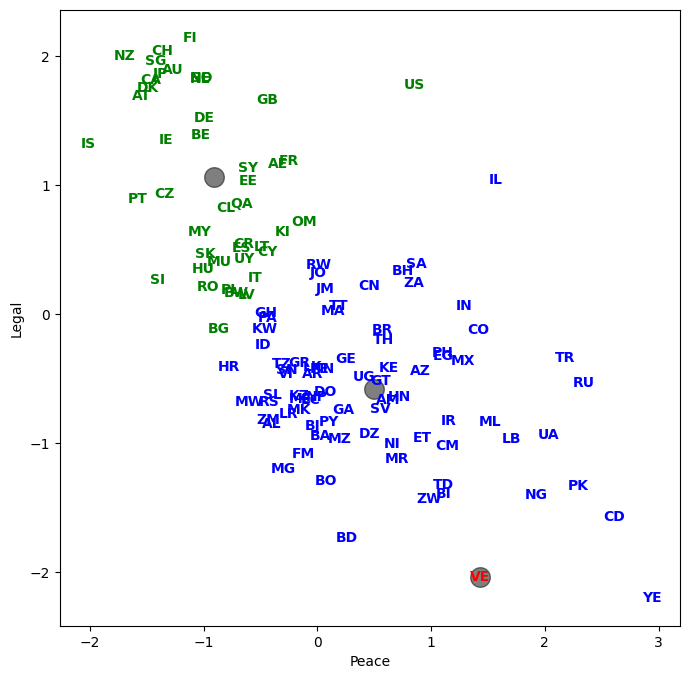

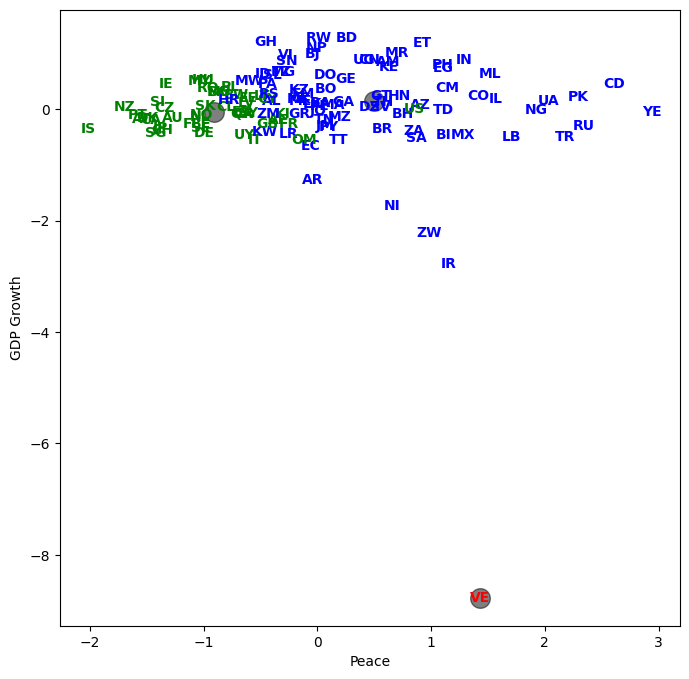

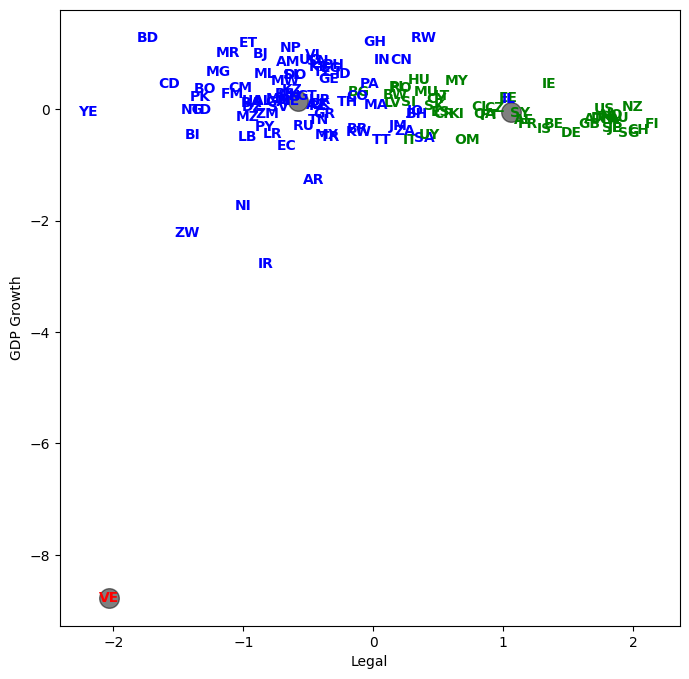

In [40]:
%matplotlib inline
import matplotlib.pyplot as plt

figs = [(0, 1), (0, 2), (1, 2)]
labels = ['Peace', 'Legal', 'GDP Growth']
colors = ['blue','green', 'red']
centers = kmeans_ven.cluster_centers_

for i in range(3):
    fig = plt.figure(i, figsize=(8, 8))
    x_1 = figs[i][0] 
    x_2 = figs[i][1]
    plt.scatter(X_ven.iloc[:, x_1], X_ven.iloc[:, x_2], c=y_ven, s=0, alpha=0)
    plt.scatter(centers[:, x_1], centers[:, x_2], c='black', s=200, alpha=0.5)
    for j in range(X_ven.shape[0]):
        plt.text(X_ven.iloc[j, x_1], X_ven.iloc[j, x_2], ven_raw['Abbrev'].iloc[j], 
                 color=colors[y_ven[j]], weight='semibold', horizontalalignment = 'center', verticalalignment = 'center')
    plt.xlabel(labels[x_1])
    plt.ylabel(labels[x_2])

plt.show()

#### Visualizing results with Matplotlib - Excluding Venezuela

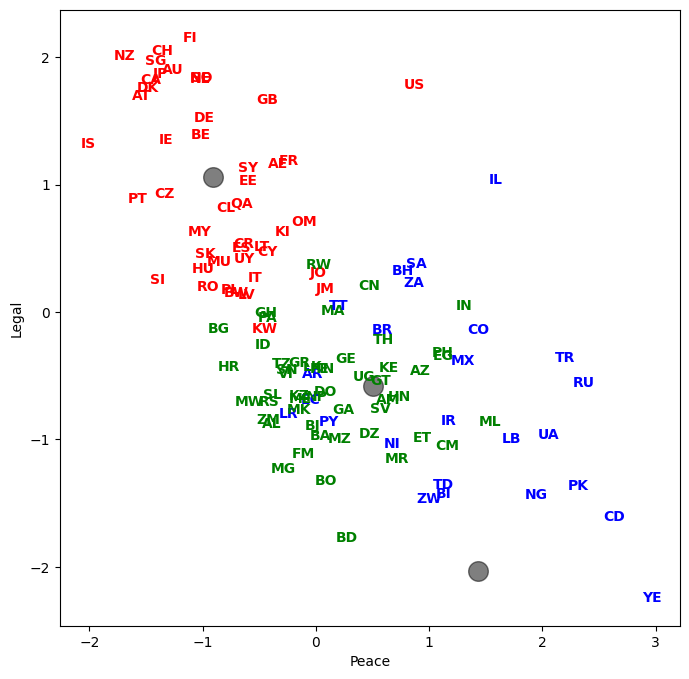

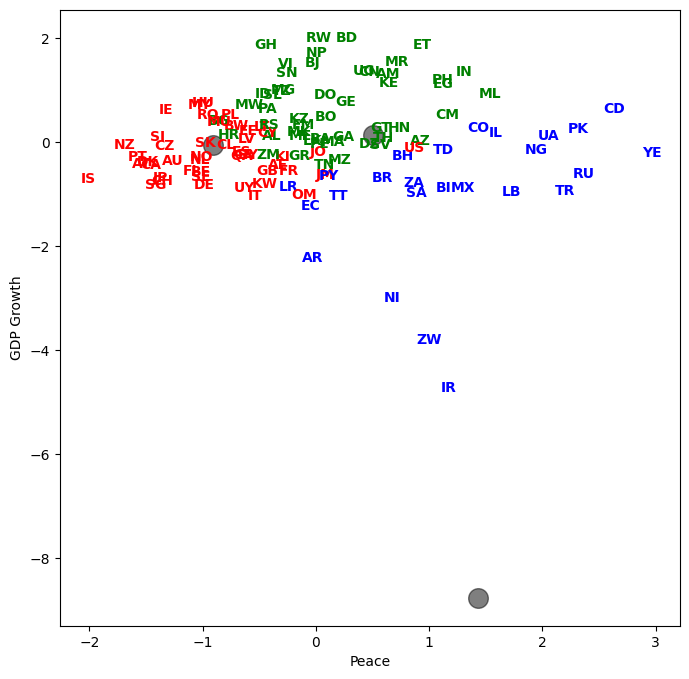

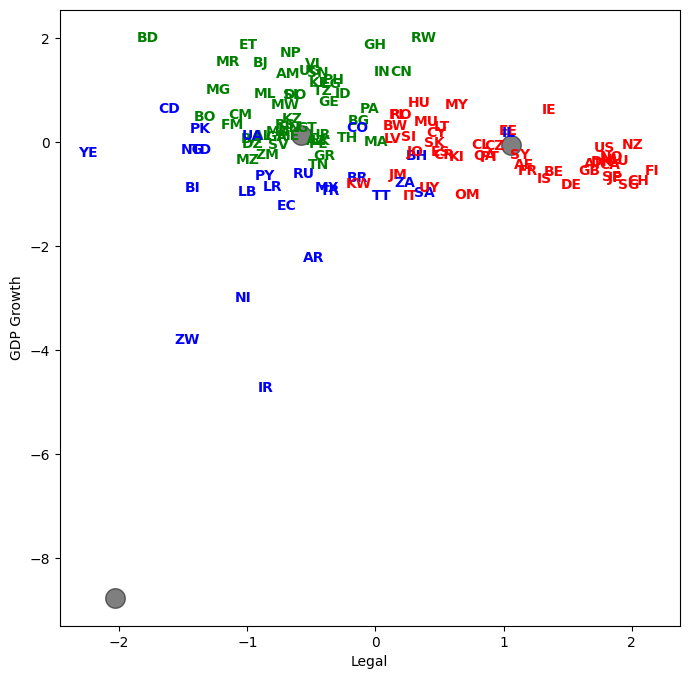

In [41]:
%matplotlib inline
import matplotlib.pyplot as plt

figs = [(0, 1), (0, 2), (1, 2)]
labels = ['Peace', 'Legal', 'GDP Growth']
colors = ['blue','green', 'red']

for i in range(3):
    fig = plt.figure(i, figsize=(8, 8))
    x_1 = figs[i][0]
    x_2 = figs[i][1]
    plt.scatter(X.iloc[:, x_1], X.iloc[:, x_2], c=y, s=0, alpha=0)
    plt.scatter(centers[:, x_1], centers[:, x_2], c='black', s=200, alpha=0.5)
    for j in range(X.shape[0]):
        plt.text(X.iloc[j, x_1], X.iloc[j, x_2], raw['Abbrev'].iloc[j], 
                 color=colors[y[j]], weight='semibold', horizontalalignment = 'center', verticalalignment = 'center')
    plt.xlabel(labels[x_1])
    plt.ylabel(labels[x_2])

plt.show()